# EVA models

\begin{equation}
    		G_j(x)= G(x;\gamma_j,\sigma_j,\mu_j) = \exp\left\{-\left[1 + \gamma_j\left( \frac{x-\mu_j}{\sigma_j} \right) \right]^{-\frac{1}{\gamma_j}}  \right\} ,
\end{equation}

\begin{equation}
			G_{\mathbb{S}}(x;\omega) = \sum_{j = 1}^{p} \omega_j G_j(x),
\end{equation}

\begin{equation}
			G_{\mathbb{P}}(x;\omega) = \prod_{j = 1}^{p} G_j^{\omega_j}(x).
\end{equation}

\begin{equation}
			\lim_{n\rightarrow +\infty} \left[G_{\mathbb{S}}\left(u_n(x)\right)\right]^n = G_{\mathbb{P}}(x),
\end{equation}

<p style="text-align: center;"> where $u_n(x)$ is a strictly increasing sequence. </p>

            


# Internal functions

In [1]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))

In [3]:
options(repr.plot.width=19, repr.plot.height=12)

# Example 1

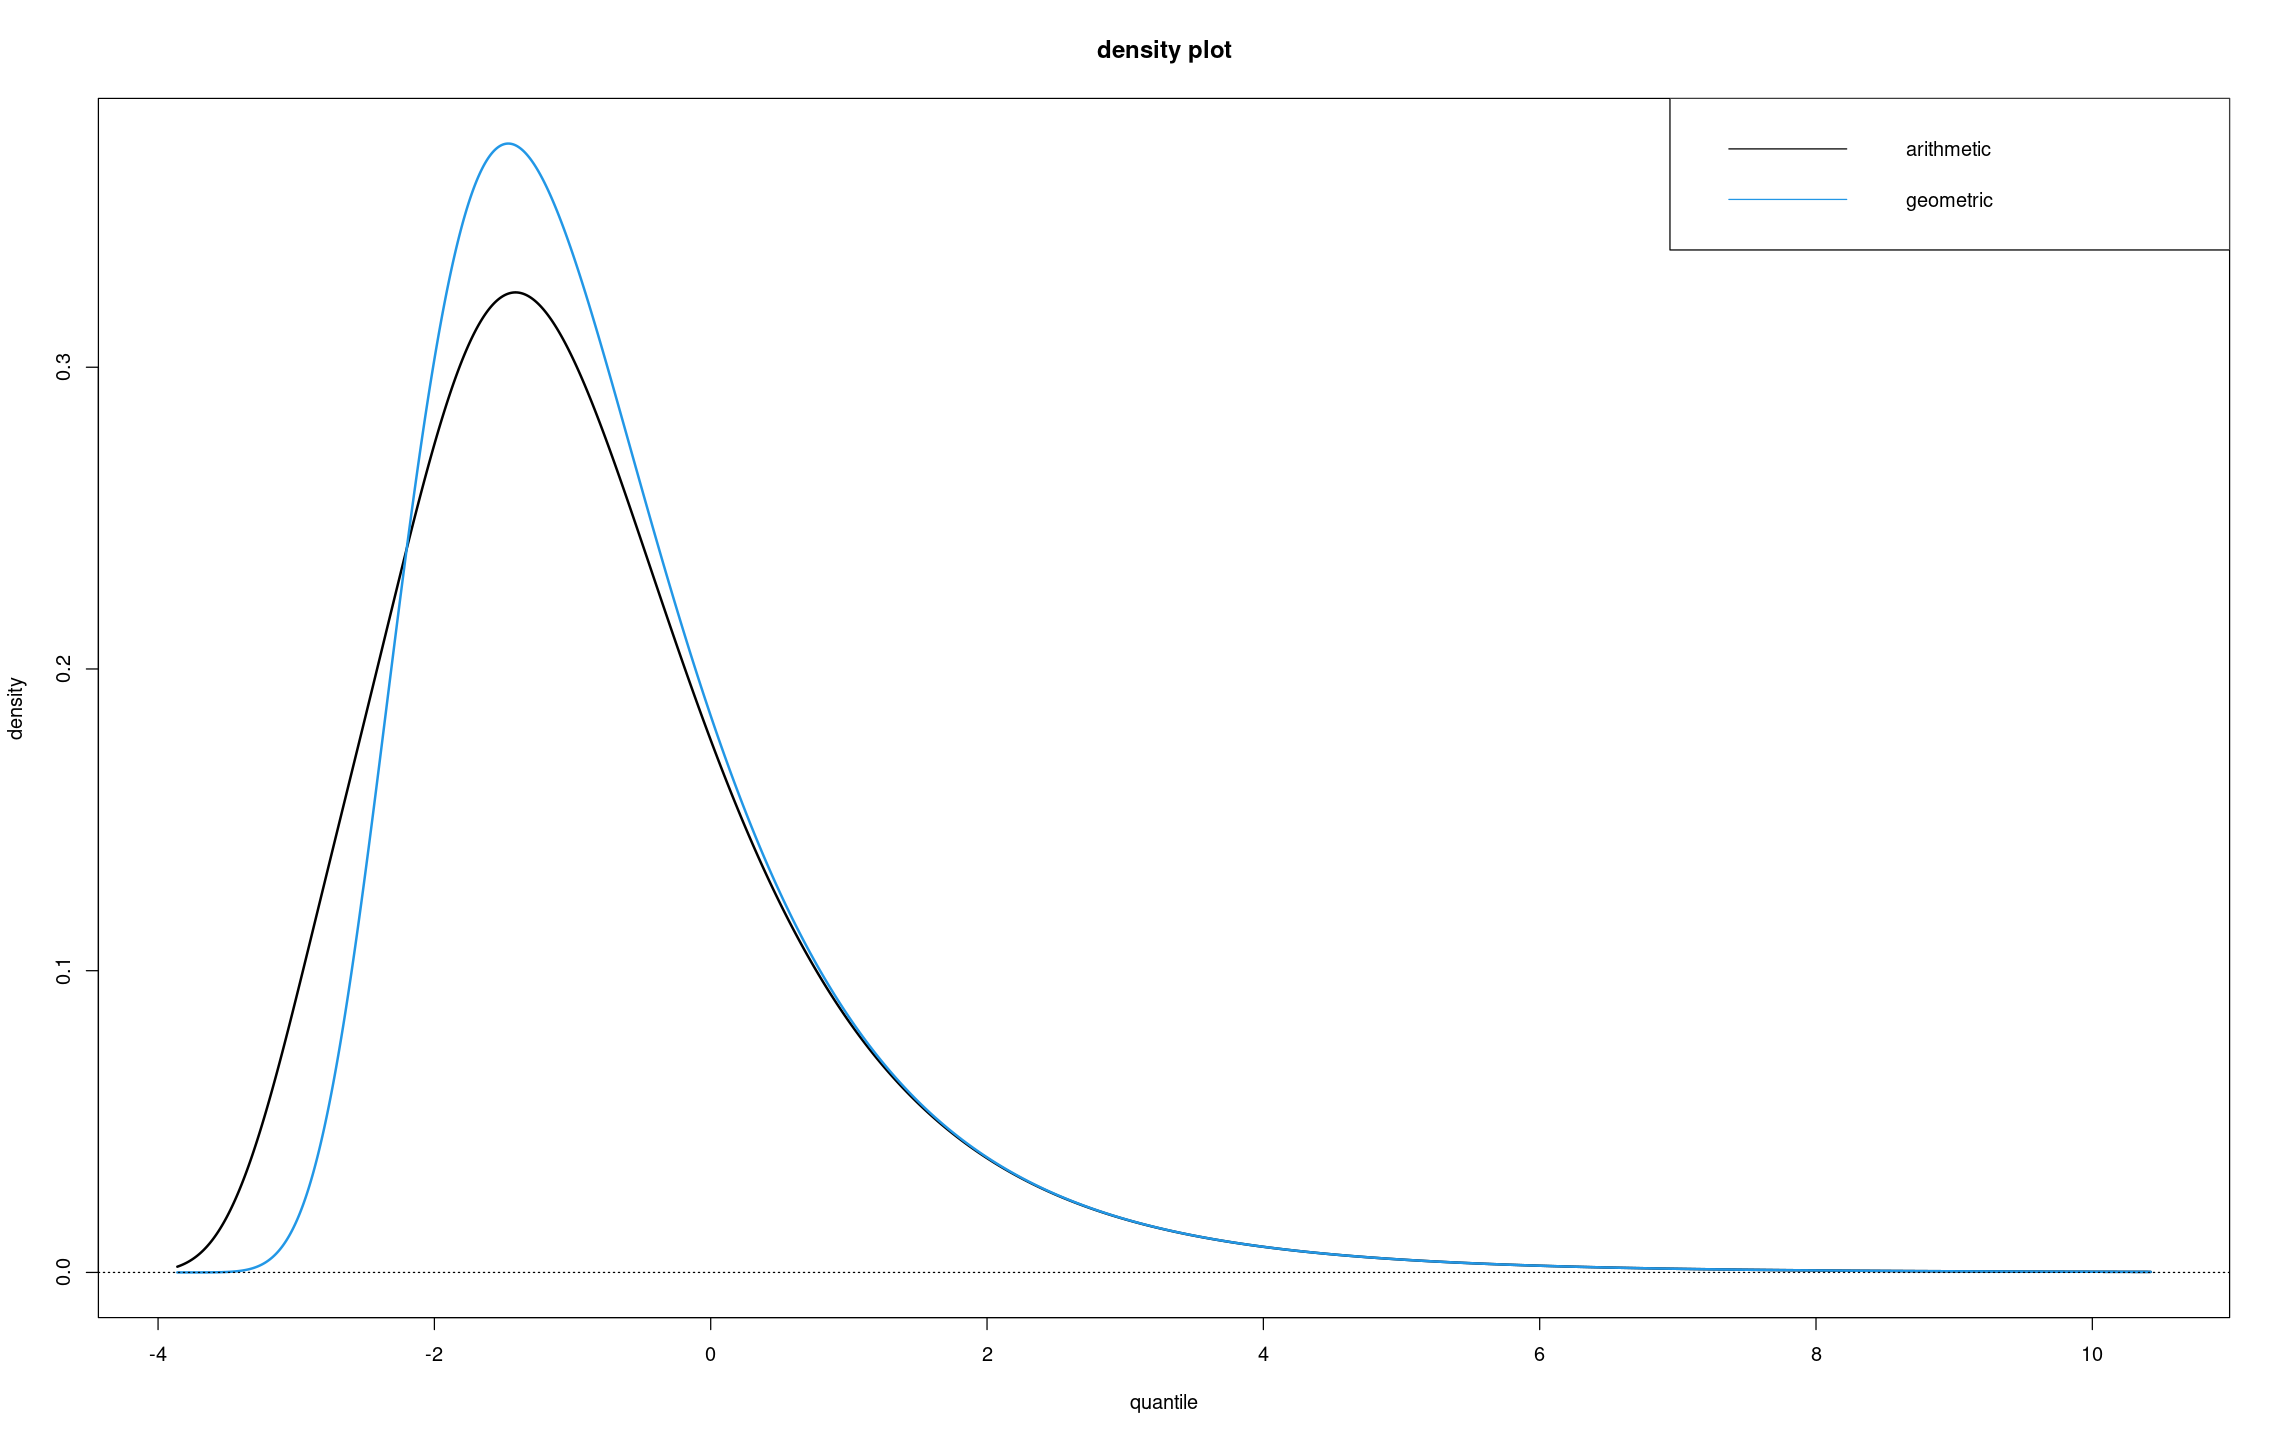

In [27]:
weights <- c(0.5, 0.5)

shapes <- c(0.1, 0.1)
scales <- c(1, 1)
locations <- c(-2, -1)

n <- 2000

sample_1 <- generate_gev_mixture_model_sample(n = n,
                                             locations,
                                             scales,
                                             shapes,
                                             weights,
                                             kind = c("geometric", "arithmetic")[2])

sample_2 <- generate_gev_mixture_model_sample(n = n,
                                             locations,
                                             scales,
                                             shapes,
                                             weights,
                                             kind = c("geometric", "arithmetic")[1])

x <- c(sample_1, sample_2)

support <- seq(from = min(x), to = max(x), length.out = n)

pdf_1 <- calculate_gev_mixture_model_pdf(x = support,
                                       locations,
                                       scales,
                                       shapes,
                                       weights,
                                       kind = c("geometric", "arithmetic")[2])

pdf_2 <- calculate_gev_mixture_model_pdf(x = support,
                                       locations,
                                       scales,
                                       shapes,
                                       weights,
                                       kind = c("geometric", "arithmetic")[1])

plot(support, pdf_1, type = "l", 
     ylim = range(c(pdf_1, pdf_2)), 
     xlim = range(support), 
     lwd = 2, xlab = "quantile", ylab = "density", 
     main = "density plot")
lines(support, pdf_2, type = "l", col = 4, lwd = 2)
legend("topright", legend = c("arithmetic", "geometric"), col = c(1, 4), lty = c(1, 1))
abline(h = 0, lty = "dotted")


# Example 2

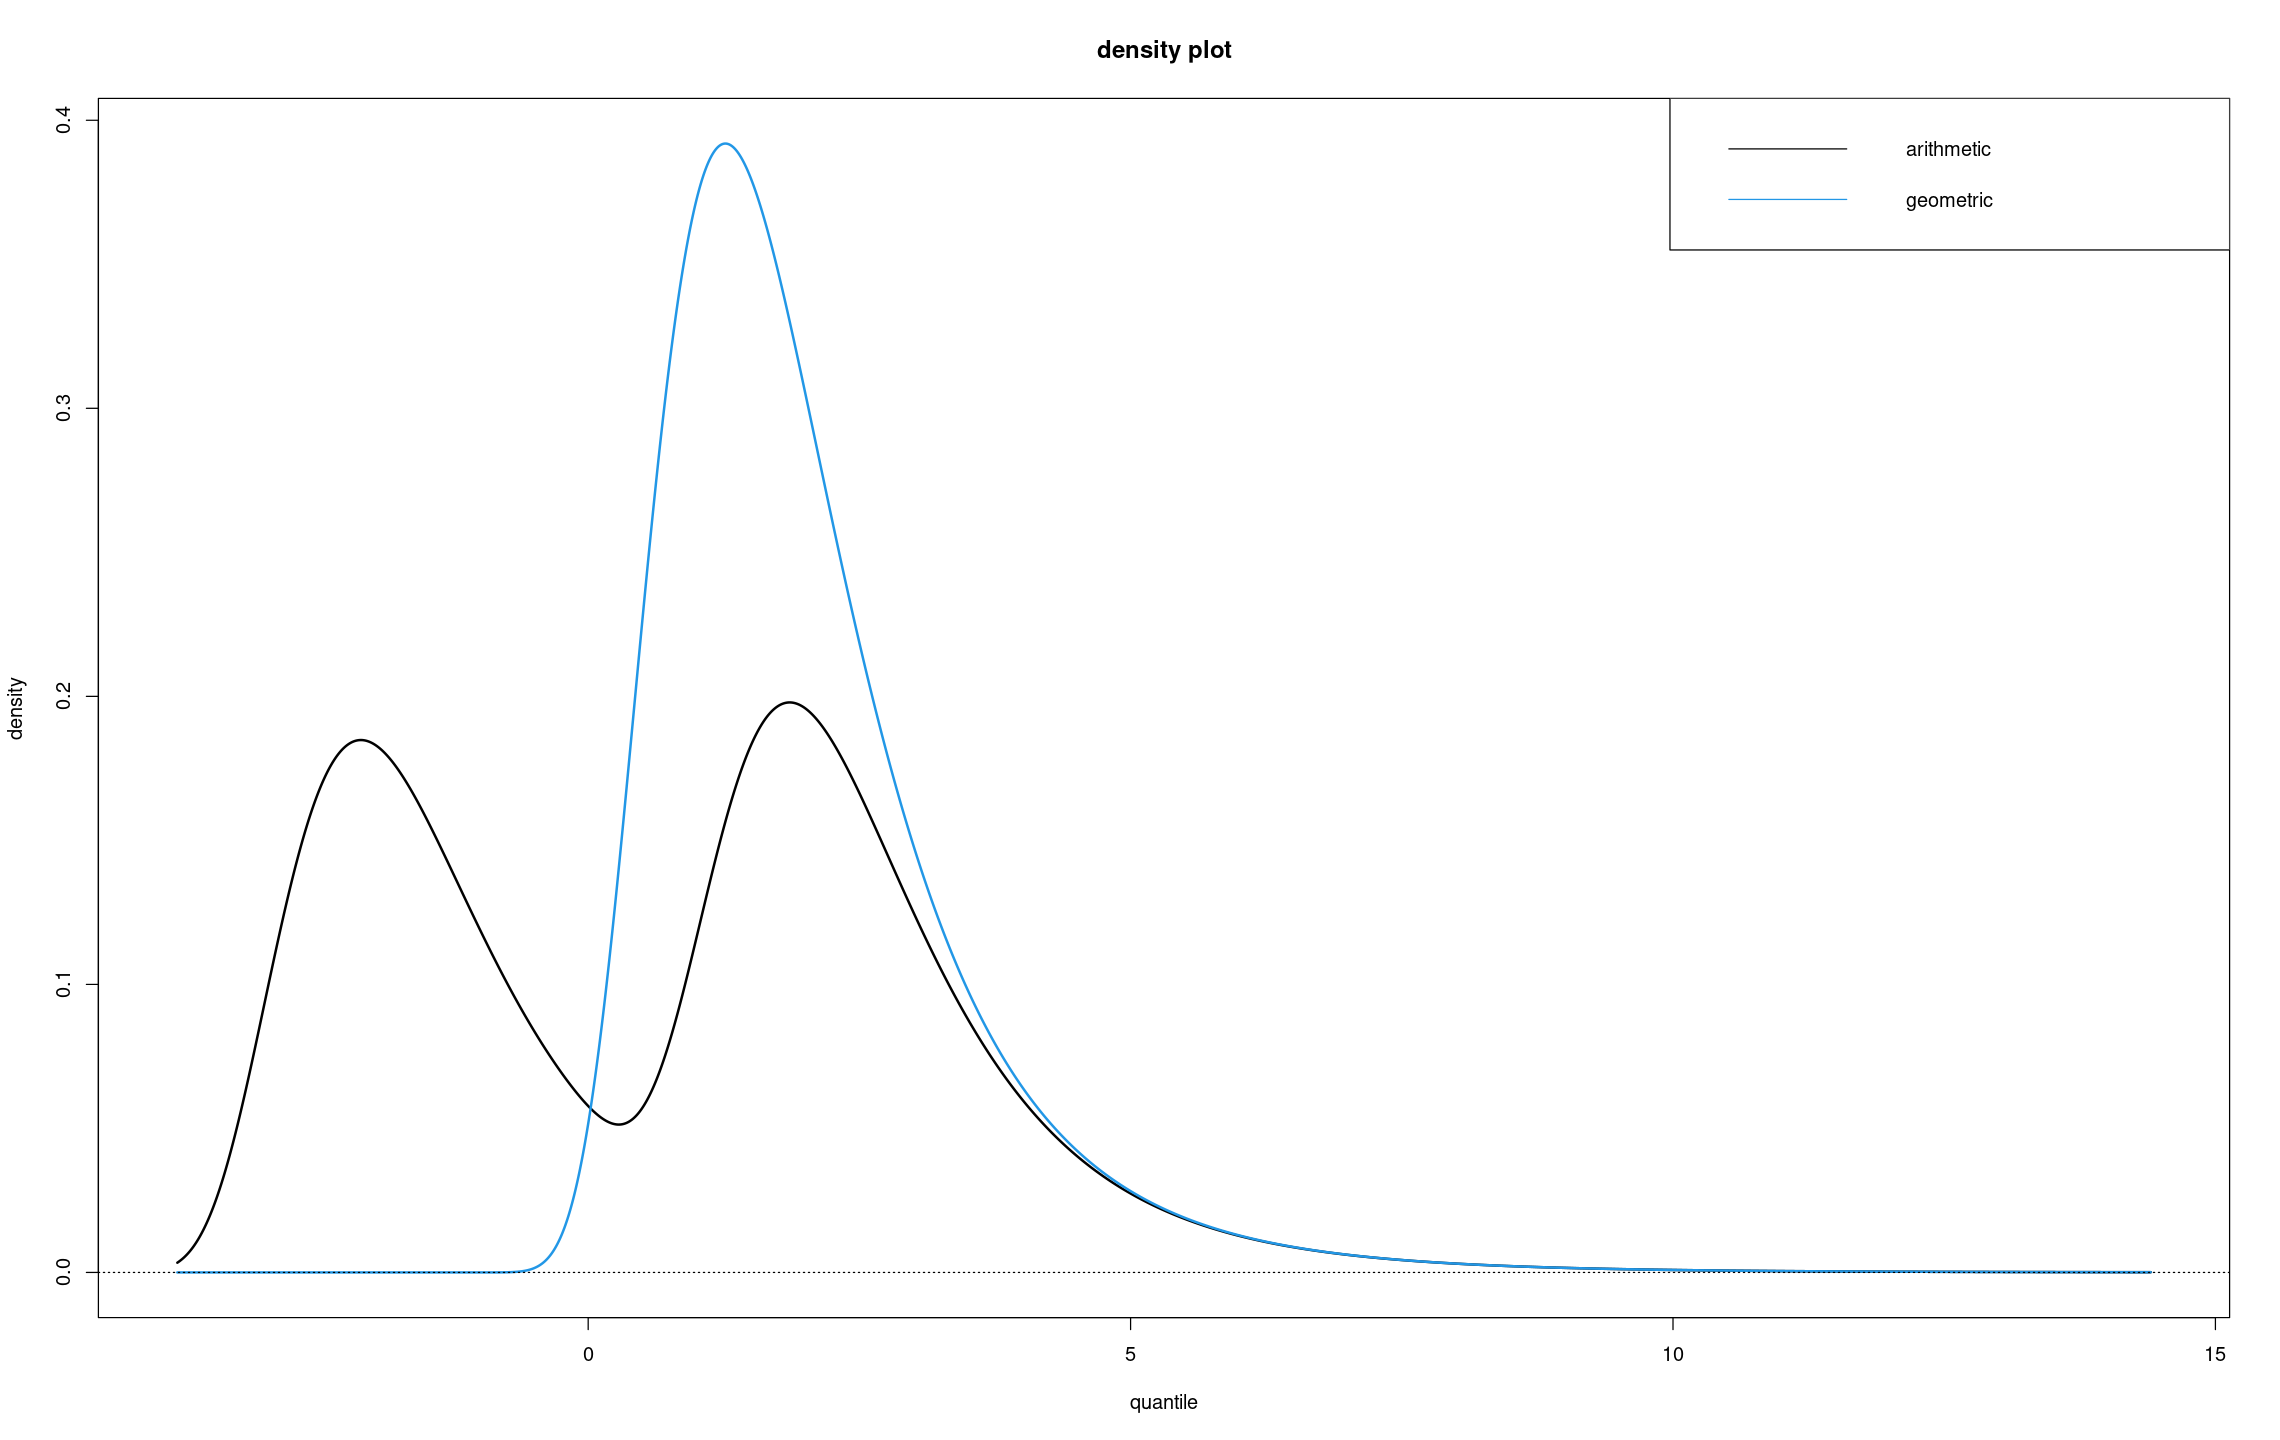

In [26]:
weights <- c(0.5, 0.5)

shapes <- c(0.1, 0.1)
scales <- c(1, 1)
locations <- c(-2, +2)

n <- 2000

sample_1 <- generate_gev_mixture_model_sample(n = n,
                                             locations,
                                             scales,
                                             shapes,
                                             weights,
                                             kind = c("geometric", "arithmetic")[2])

sample_2 <- generate_gev_mixture_model_sample(n = n,
                                             locations,
                                             scales,
                                             shapes,
                                             weights,
                                             kind = c("geometric", "arithmetic")[1])

x <- c(sample_1, sample_2)

support <- seq(from = min(x), to = max(x), length.out = n)

pdf_1 <- calculate_gev_mixture_model_pdf(x = support,
                                       locations,
                                       scales,
                                       shapes,
                                       weights,
                                       kind = c("geometric", "arithmetic")[2])

pdf_2 <- calculate_gev_mixture_model_pdf(x = support,
                                       locations,
                                       scales,
                                       shapes,
                                       weights,
                                       kind = c("geometric", "arithmetic")[1])

plot(support, pdf_1, type = "l", 
     ylim = range(c(pdf_1, pdf_2)), 
     xlim = range(support), 
     lwd = 2, xlab = "quantile", ylab = "density", 
     main = "density plot")
lines(support, pdf_2, type = "l", col = 4, lwd = 2)
legend("topright", legend = c("arithmetic", "geometric"), col = c(1, 4), lty = c(1, 1))
abline(h = 0, lty = "dotted")


# Example 3

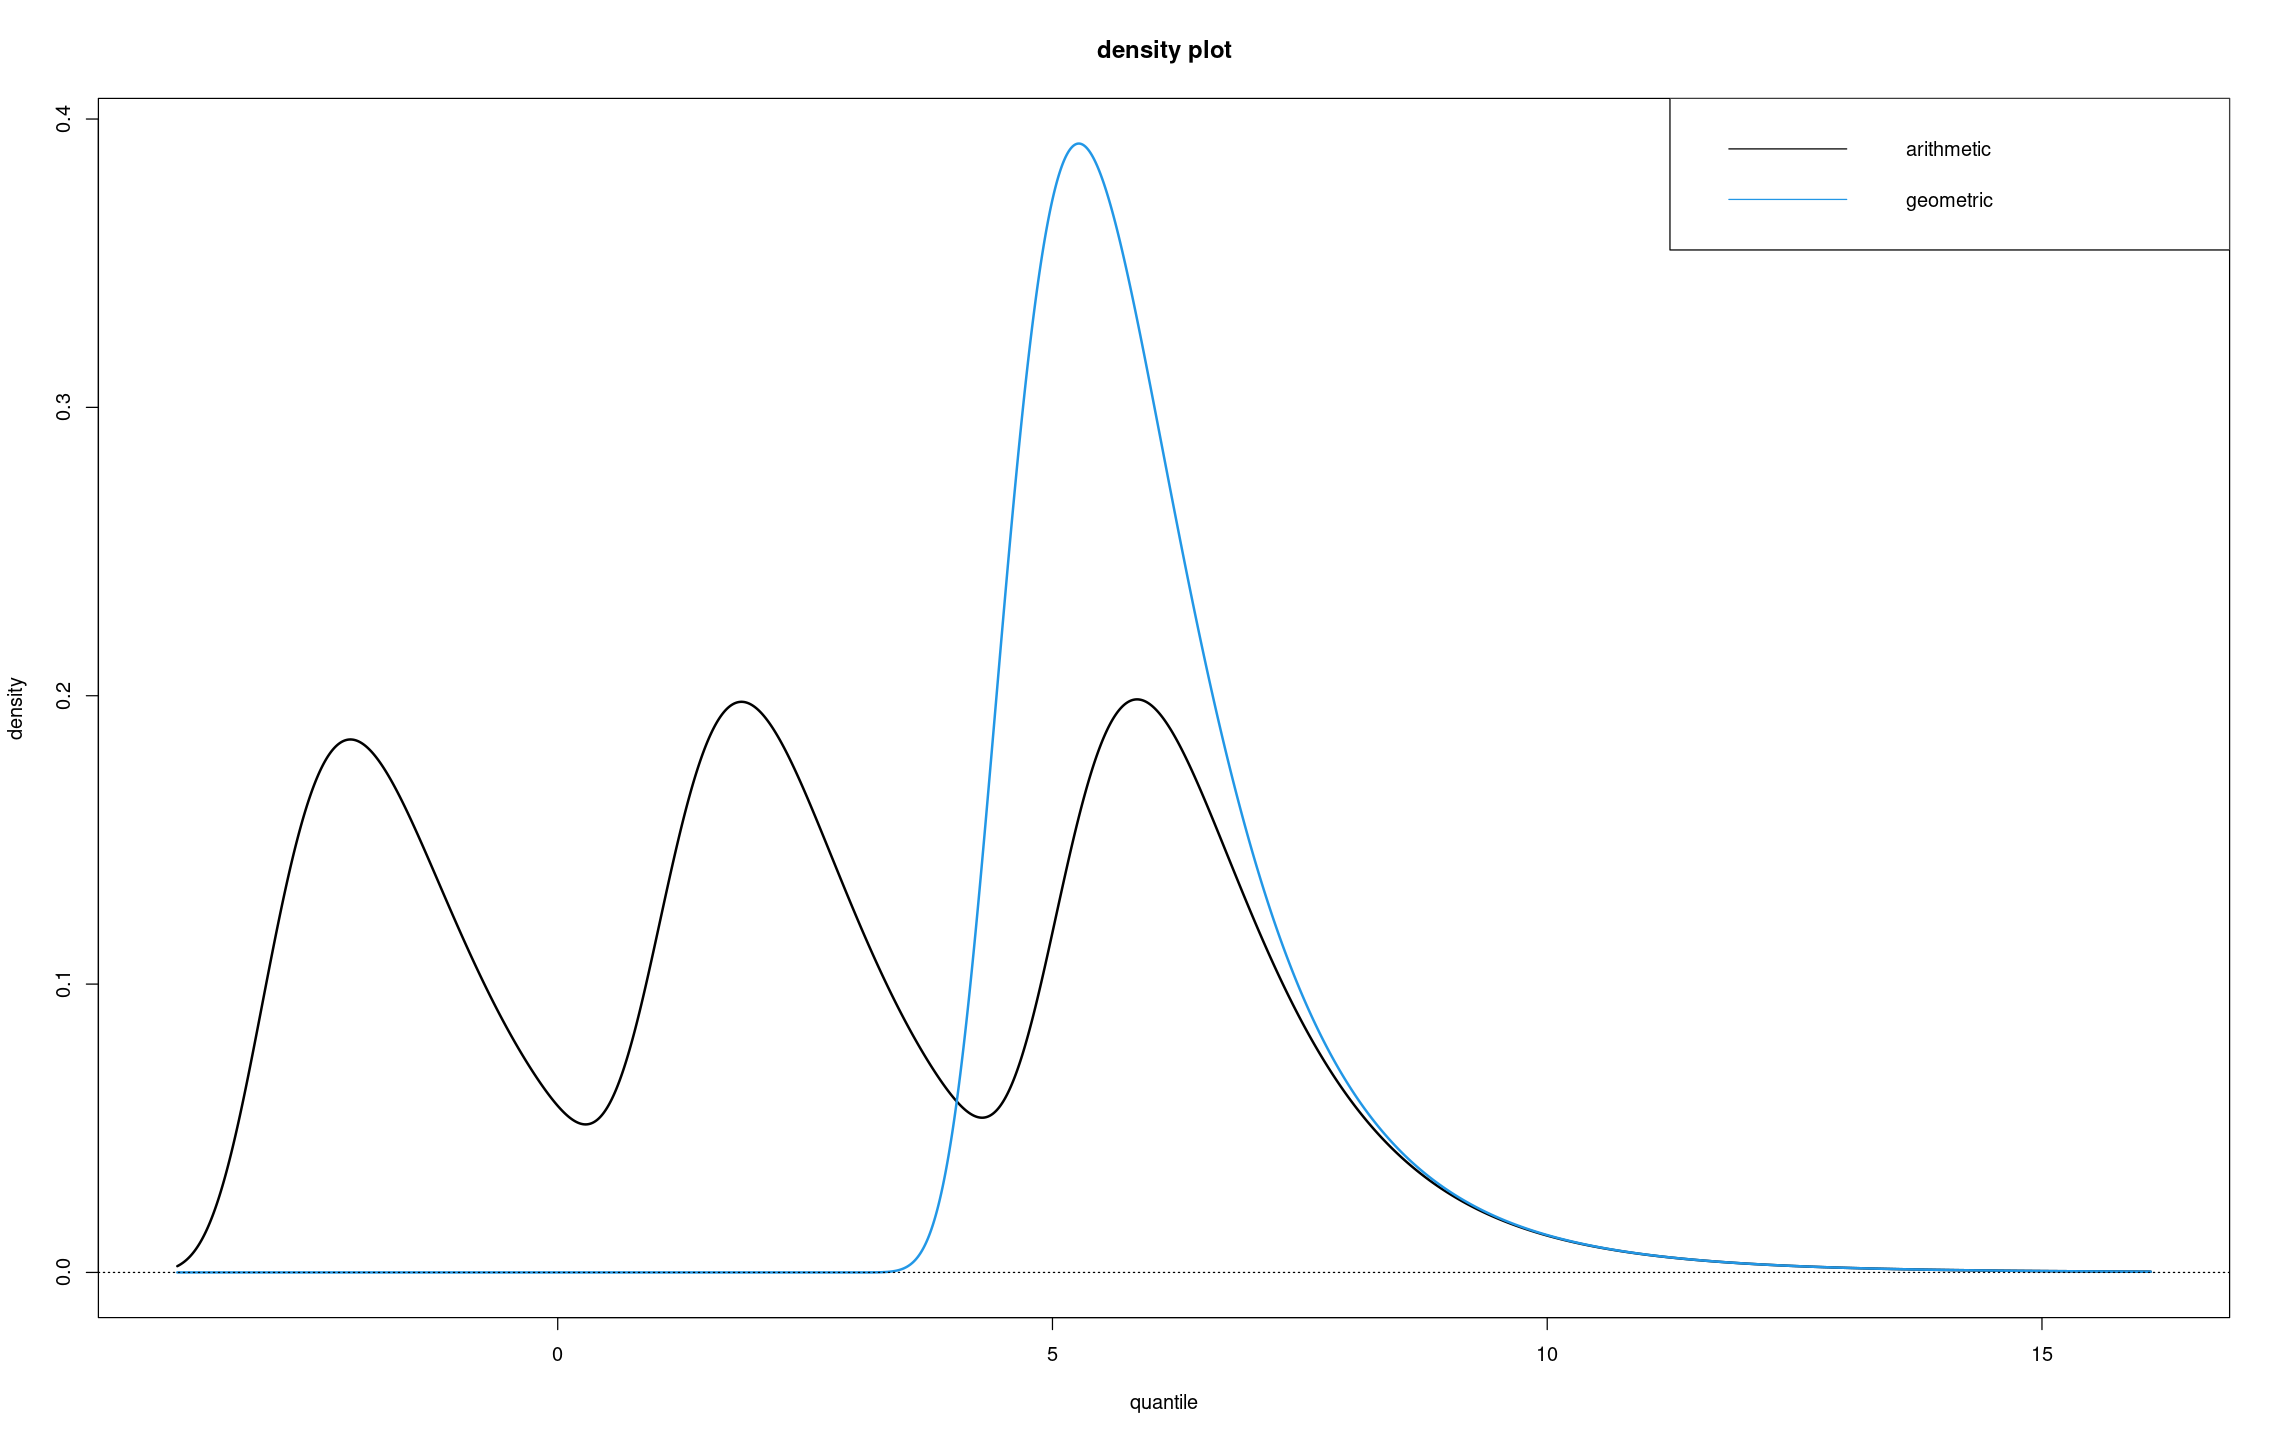

In [25]:
weights <- c(0.5, 0.5, 0.5)

shapes <- c(0.1, 0.1, 0.1)
scales <- c(1, 1, 1)

locations <- c(-2, +2, +6)

n <- 3000

sample_1 <- generate_gev_mixture_model_sample(n = n,
                                             locations,
                                             scales,
                                             shapes,
                                             weights,
                                             kind = c("geometric", "arithmetic")[2])

sample_2 <- generate_gev_mixture_model_sample(n = n,
                                             locations,
                                             scales,
                                             shapes,
                                             weights,
                                             kind = c("geometric", "arithmetic")[1])

x <- c(sample_1, sample_2)

support <- seq(from = min(x), to = max(x), length.out = n)

pdf_1 <- calculate_gev_mixture_model_pdf(x = support,
                                       locations,
                                       scales,
                                       shapes,
                                       weights,
                                       kind = c("geometric", "arithmetic")[2])

pdf_2 <- calculate_gev_mixture_model_pdf(x = support,
                                       locations,
                                       scales,
                                       shapes,
                                       weights,
                                       kind = c("geometric", "arithmetic")[1])

plot(support, pdf_1, type = "l", 
     ylim = range(c(pdf_1, pdf_2)), 
     xlim = range(support), 
     lwd = 2, xlab = "quantile", ylab = "density", 
     main = "density plot")
lines(support, pdf_2, type = "l", col = 4, lwd = 2)
legend("topright", legend = c("arithmetic", "geometric"), col = c(1, 4), lty = c(1, 1))
abline(h = 0, lty = "dotted")
